<a href="https://colab.research.google.com/github/All4Nothing/pytorch-DL-programming/blob/main/Ch03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such 

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1

**[런타임] -> [런타임 다시시작]**

In [ ]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [ ]:
# 파이토치 관련 라이브러리
import torch
from torchviz import make_dot

In [ ]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [ ]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

### 03. 처음 시작하는 머신러닝

## 3.4 경사 하강법 구현

**![경사 하강법의 구현 개요] 그림**

### 예축 계산  
$Y_p = W * X + B $  
예측 함수를 통해 예측 값으로 Yp를 구하는 것.

### 손실 계산  
예측 계산의 결과인 $Y_p$와 정답 $Y$의 차이를 평가하기 위해 두 텐서를 입력으로 받는 **'손실'**을 정의한다.  
$Y_p$와 $Y$의 차가 작을수록 작아지는 함수(손실 함수)를 선택해, 그 계산 결과를 손실 값으로 한다.

### 경사 계산  
예측 함수를 구성하는 파라미터 $W$와 $B$의 값을 조금씩 바꿔가며, 그때 변화한 손실의 정도(경사)를 살펴보는 과정이다.

### 파라미터 수정  
경삿값(경사 계산의 결과)에 작은 정수(학습률) $lr$을 곱해, 그 값만큼 $W$와 $B$를 동시에 줄여 나가는 과정이다.

In [ ]:
def L(u, v):
    return 3 * u**2 + 3 * v**2 - u*v + 7*u - 7*v + 10
def Lu(u, v):
    return 6* u - v + 7
def Lv(u, v):
    return 6* v - u - 7

u = np.linspace(-5, 5, 501)
v = np.linspace(-5, 5, 501)
U, V = np.meshgrid(u, v)
Z = L(U, V)

In [ ]:
# 경사 하강법 시뮬레이션
W = np.array([4.0, 4.0])
W1 = [W[0]]
W2 = [W[1]]
N = 21
alpha = 0.05
for i in range(N):
    W = W - alpha *np.array([Lu(W[0], W[1]), Lv(W[0], W[1])])
    W1.append(W[0])
    W2.append(W[1])

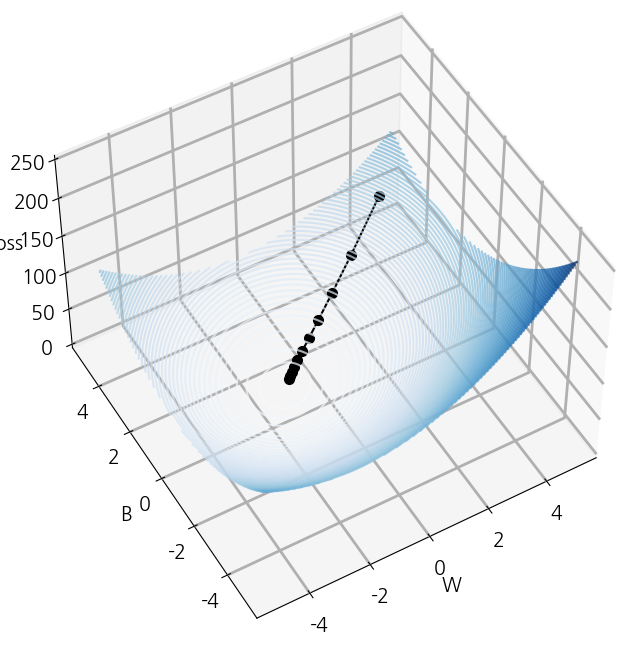

In [ ]:
n_loop=11

WW1 = np.array(W1[:n_loop])
WW2 = np.array(W2[:n_loop])
ZZ = L(WW1, WW2)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_zlim(0,250)
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('loss')
ax.view_init(50, 240)
ax.xaxis._axinfo["grid"]['linewidth'] = 2.
ax.yaxis._axinfo["grid"]['linewidth'] = 2.
ax.zaxis._axinfo["grid"]['linewidth'] = 2.
ax.contour3D(U, V, Z, 100, cmap='Blues', alpha=0.7)
ax.plot3D(WW1, WW2, ZZ, 'o-', c='k', alpha=1, markersize=7)
plt.show()

## 3.5 데이터 전처리

다섯명의 신장과 체중 데이터를 사용한다.
1차 함수를 사용해 신장으로 체중을 예측하는 경우, 최적 직선을 구하는 것이 목적이다.

In [ ]:
# 샘플 데이터 선언
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0,60.1]
])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [ ]:
# 머신러닝 모델에서 사용하기 위해, 신장을 변수 x로,
# 체중을 변수 y로 함

x = sampleData1[:,0]
y = sampleData1[:,1]

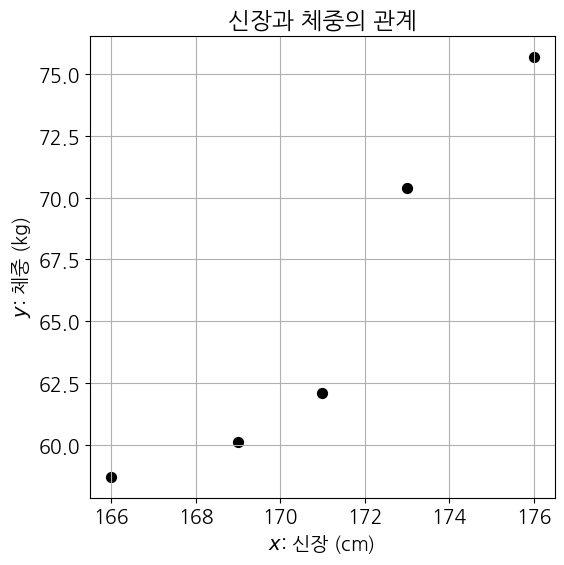

In [ ]:
# 산포도 출력 확인

plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$: 신장 (cm) ')
plt.ylabel('$y$: 체중 (kg)')
plt.title('신장과 체중의 관계')
plt.show()

### 데이터 변환

머신러닝 모델에서 데이터는 0에 가까운 값을 갖는 것이 바람직하다. 따라서, x, y 모두 평균값이 0이 되도록 평행이동시켜서 새로운 좌표계를 X, Y로 한다.

In [ ]:
X = x - x.mean()
Y = y - y.mean()

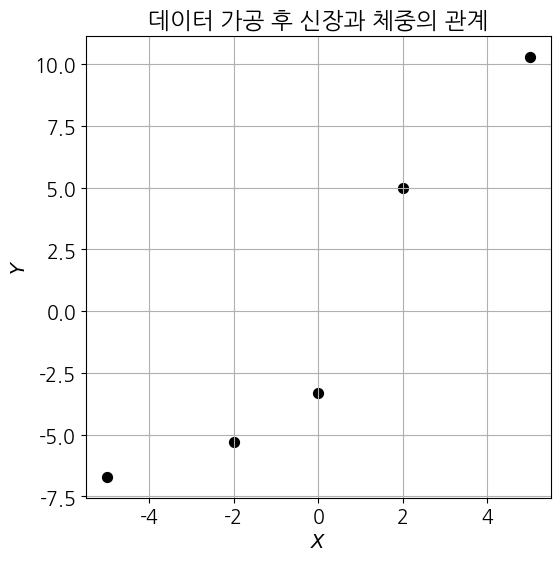

In [ ]:
# 산포도를 통해 결과 확인

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('데이터 가공 후 신장과 체중의 관계')
plt.show()

## 3.6 예측 계산

In [ ]:
# X와 Y를 텐서 변수로 변환

X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

In [ ]:
# 결과 확인

print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [ ]:
# 파라미터 정의
# W와 B는 경사 계산을 위해, requires_grad=True 로 설정함

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [ ]:
# 예측 함수는 1차 함수

def pred(X):
    return W * X + B

In [ ]:
# 예측 값 계산

Yp =  pred(X)

In [ ]:
# 결과 확인

print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


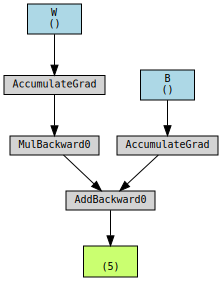

In [ ]:
# 예측 값의 계산 그래프 표시

params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)
display(g)

## 3.7 손실 계산

In [ ]:
# 평균 제곱 오차 손실함수

def mse(Yp, Y):
    loss = ((Yp - Y) ** 2).mean()
    return loss

In [ ]:
# 손실 계산

loss = mse(Yp, Y)

In [ ]:
# 결과 표시

print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


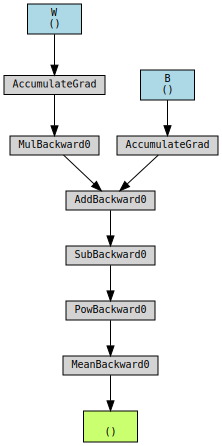

In [ ]:
# 손실 계산 그래프 출력

params = {'W': W, 'B': B}
g = make_dot(loss, params=params)
display(g)

예측 함수: MulBackward0, AddBackward0  
손실 함수: SubBackward0, PowBackward0, MeanBackward0  
'손실'이란 예측 함수와 손실 함수의 합성 함수이다.

## 3.8 경사 계산

In [ ]:
# 경사 계산

loss.backward()

In [ ]:
# 경삿값 확인

print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


## 3.9 파라미터 수정

In [ ]:
# 학습률 정의

lr = 0.001

#  경사를 기반으로 파라미터 수정

W -= lr * W.grad
B -= lr * B.grad

RuntimeError: ignored

경사 계산을 하는 도중의 변수(W와B)는 외부에 영향을 끼치므로 마음대로 값을 수정할 수 없다.  
with torch.no_grad()라는 컨텍스트를 설정해 두면, 이 컨텍스트 내부에서는 일시적으로 계산 그래프 생성 기능이 작동하지 않으며, 변수를 수정할 수 있다.

In [ ]:
# 경사를 기반으로 파라미터 수정
# with torch.no_grad() 작성 필요

with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad
    
    # 계산이 끝난 경삿값을 초기화함
    W.grad.zero_()
    B.grad.zero_()

In [ ]:
# 파라미터 경삿값 확인

print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


## 3.10 반복 계산

In [ ]:
# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

In [ ]:
# 루프 처리

for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(X)
    
    # 손실 계산
    loss = mse(Yp, Y)
    
    # 경사 계산
    loss.backward()
    
    with torch.no_grad():
        # 파라미터 수정
        W -= lr * W.grad
        B -= lr * B.grad
        
        # 경삿값 초기화
        W.grad.zero_()
        B.grad.zero_()
        
    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

## 3.11 결과 평가

In [ ]:
# 최종 파라미터 값
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

# 손실 확인
print(f'초기상태 : 손실:{history[0,1]:.4f}') 
print(f'최종상태 : 손실:{history[-1,1]:.4f}') 

W =  1.820683
B =  0.3675114
초기상태 : 손실:13.3520
최종상태 : 손실:4.6796


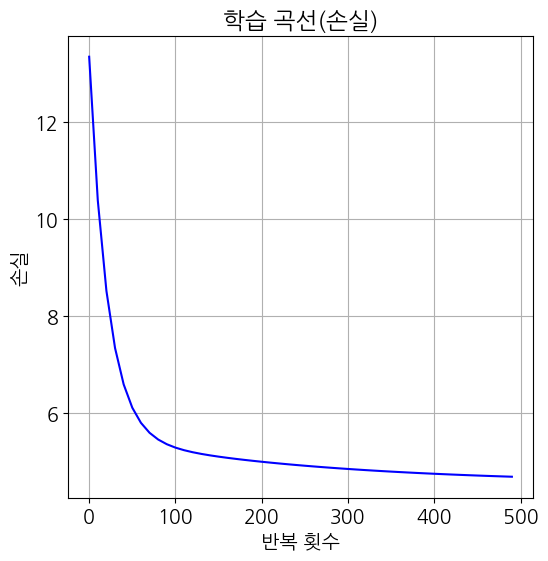

In [ ]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

In [ ]:
# x의 범위를 구함(Xrange)
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

# 이와 대응하는 예측값 y를 구함
Y_range = pred(X_range)
print(Y_range.data)

tensor([-5.,  5.])
tensor([-8.7359,  9.4709])


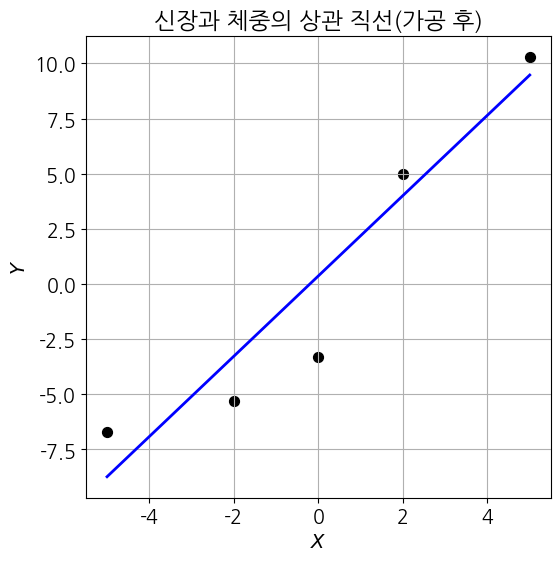

In [ ]:
# 그래프 출력

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('신장과 체중의 상관 직선(가공 후)')
plt.show()

In [ ]:
# y좌표와 x좌표 값 계산

x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

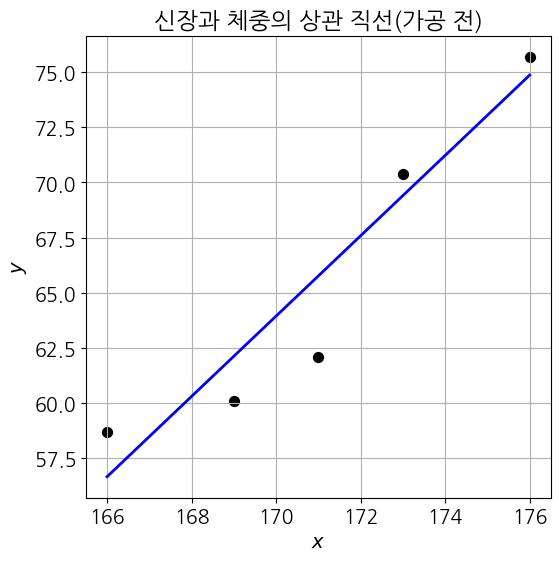

In [ ]:
# 그래프 출력

plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_range, yp_range.data, lw=2, c='b')
plt.title('신장과 체중의 상관 직선(가공 전)')
plt.show()

## 3.12 최적화 함수와 step 함수 이용하기

In [ ]:
# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# optimizer 로 SGD(확률적 경사 하강법)을 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

In [ ]:
# 루프 처리

for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(X)
    
    # 손실 계산
    loss = mse(Yp, Y)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()
    
    # 경삿값 초기화
    optimizer.zero_grad()
        
    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

W와 B 값을 직접 변경했던 부분을 step 함수의 호출로 대신하고 있다.

In [ ]:
# 최종 파라미터 값
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

# 손실 확인
print(f'초기상태 : 손실:{history[0,1]:.4f}') 
print(f'최종상태 : 손실:{history[-1,1]:.4f}') 

W =  1.820683
B =  0.3675114
초기상태 : 손실:13.3520
최종상태 : 손실:4.6796


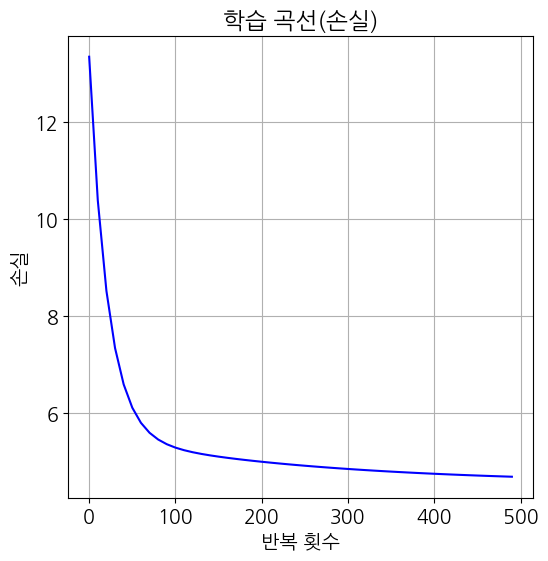

In [ ]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

step 함수는 다음의 코드와 같은 로직을 수행하고 있다.

In [ ]:
'''
with torch.no_grad():
        # 파라미터 수정
        # 프레임워크를 사용하는 경우는 step 함수가 이를 대신함
        W -= lr * W.grad
        B -= lr * B.grad
'''

'\nwith torch.no_grad():\n        # 파라미터 수정\n        # 프레임워크를 사용하는 경우는 step 함수가 이를 대신함\n        W -= lr * W.grad\n        B -= lr * B.grad\n'

### 최적화 함수 튜닝

In [ ]:
# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# optimizer로 SGD(확률적 경사 하강법)을 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

# history 기록을 위한 배열 초기화
history2 = np.zeros((0, 2))

In [ ]:
# 루프 처리

for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(X)
    
    # 손실 계산
    loss = mse(Yp, Y)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()
    
    # 경삿값 초기화
    optimizer.zero_grad()
        
    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 5.7585
epoch = 20  loss = 5.9541
epoch = 30  loss = 5.0276
epoch = 40  loss = 4.8578
epoch = 50  loss = 4.7052
epoch = 60  loss = 4.6327
epoch = 70  loss = 4.5940
epoch = 80  loss = 4.5698
epoch = 90  loss = 4.5574
epoch = 100  loss = 4.5495
epoch = 110  loss = 4.5452
epoch = 120  loss = 4.5426
epoch = 130  loss = 4.5411
epoch = 140  loss = 4.5403
epoch = 150  loss = 4.5398
epoch = 160  loss = 4.5395
epoch = 170  loss = 4.5393
epoch = 180  loss = 4.5392
epoch = 190  loss = 4.5391
epoch = 200  loss = 4.5391
epoch = 210  loss = 4.5391
epoch = 220  loss = 4.5391
epoch = 230  loss = 4.5390
epoch = 240  loss = 4.5390
epoch = 250  loss = 4.5390
epoch = 260  loss = 4.5390
epoch = 270  loss = 4.5390
epoch = 280  loss = 4.5390
epoch = 290  loss = 4.5390
epoch = 300  loss = 4.5390
epoch = 310  loss = 4.5390
epoch = 320  loss = 4.5390
epoch = 330  loss = 4.5390
epoch = 340  loss = 4.5390
epoch = 350  loss = 4.5390
epoch = 360  loss = 4.5390
epoch = 370

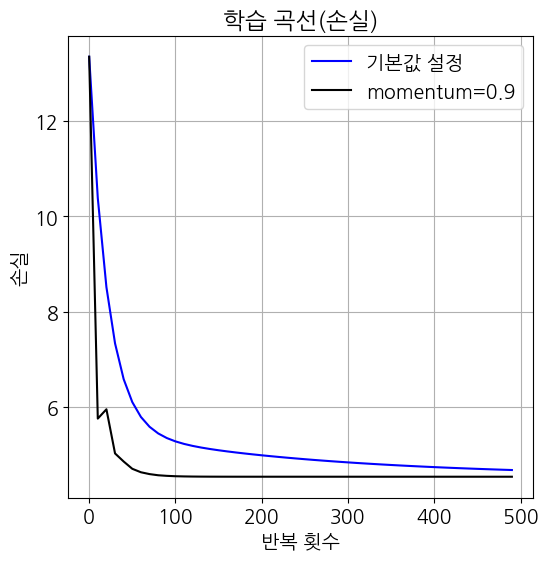

In [ ]:
# 학습 곡선(손실) 출력

plt.plot(history[:,0], history[:,1], 'b', label='기본값 설정')
plt.plot(history2[:,0], history2[:,1], 'k', label='momentum=0.9')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.legend()
plt.title('학습 곡선(손실)')
plt.show()

SGD 최적화 함수 클래스는 momentum으로 불리는 학습을 빠르게 해주는 알고리즘이 구현되어있어, 파라미터 값을 지정해주면 그에 해당하는 알고리즘이 작동한다.  
최적화 함수, 또는 그 파라미터 값의 변경으로 간편하게 알고리즘을 최적화할 수 있다는 것이 최적화 함수를 사용하는 장점 중 하나이다.